In [8]:
from langgraph.graph import StateGraph, START, END
from pprint import pprint
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage, AnyMessage

messages = [AIMessage(content=f"So You Said you were Research on Wild Animals", name="Model")]
messages.extend([HumanMessage(content=f"Yeah that's right", name="Hijab")])
messages.extend([AIMessage(content=f"Great, Would you like to learn more about Wild Animals", name="Model")])
messages.extend([HumanMessage(content=f"I want to learn about the best places to see leopard in the World", name="Hijab")])

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So You Said you were Research on Wild Animals
================================ Human Message =================================
Name: Hijab

Yeah that's right
================================== Ai Message ==================================
Name: Model

Great, Would you like to learn more about Wild Animals
================================ Human Message =================================
Name: Hijab

I want to learn about the best places to see leopard in the World


In [2]:
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

load_dotenv()

True

In [3]:
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.2)
response = llm.invoke(messages)

pprint(response.content)

('Leopards are elusive and beautiful big cats that can be found in various '
 'parts of the world. Here are some of the best places to see leopards in '
 'their natural habitat:\n'
 '\n'
 '1. **Yala National Park, Sri Lanka**: Yala is one of the best places to see '
 'leopards in the wild. The park has a high density of leopards, and sightings '
 'are relatively common.\n'
 '\n'
 '2. **Kruger National Park, South Africa**: This iconic park is home to a '
 'diverse range of wildlife, including leopards. The Sabi Sands Game Reserve, '
 'adjacent to Kruger, is particularly known for excellent leopard sightings.\n'
 '\n'
 '3. **Masai Mara National Reserve, Kenya**: The Masai Mara is famous for its '
 'wildlife and offers good opportunities to see leopards, especially during '
 'the Great Migration when prey is abundant.\n'
 '\n'
 '4. **Bandhavgarh National Park, India**: While Bandhavgarh is known for its '
 'tiger population, leopards are also frequently spotted here, especially in '
 'th

In [5]:
def Multiply(a:int, b:int):
    """Multiply A & B

    Args:
        a: first int
        b: second int
    """
    return a * b

llm_tools = llm.bind_tools([Multiply])

In [7]:
tool_call = llm_tools.invoke([HumanMessage("What is Multiply by 2 & 3", name="Hijab")])
tool_call

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_Z3NymcZTOqEq41mxYDnFVfnk', 'function': {'arguments': '{"a": 2, "b": 3}', 'name': 'Multiply'}, 'type': 'function'}, {'id': 'call_UrZSxzOJ34KfCG3UHqoRC2w3', 'function': {'arguments': '{"a": 3, "b": 2}', 'name': 'Multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 52, 'prompt_tokens': 64, 'total_tokens': 116, 'completion_tokens_details': {'audio_tokens': 0, 'reasoning_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0ba0d124f1', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-c81731b0-cdff-4bba-b7b6-0aa89443c9bd-0', tool_calls=[{'name': 'Multiply', 'args': {'a': 2, 'b': 3}, 'id': 'call_Z3NymcZTOqEq41mxYDnFVfnk', 'type': 'tool_call'}, {'name': 'Multiply', 'args': {'a': 3, 'b': 2}, 'id': 'call_UrZS

In [9]:
from typing import Annotated, TypedDict
from langgraph.graph.message import add_messages

class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]


In [10]:
from langgraph.graph import MessagesState

class State(MessagesState):
    pass

In [11]:
initial_messages = [
    AIMessage(content="Hello! How can I assist you today?", name="Model"),
    HumanMessage(content="I'm looking Information on Applied Physics", name="Hijab")
]

new_message = AIMessage(content="Sure! What specific information are you looking for?", name="Model")

add_messages(initial_messages, new_message)

[AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={}, name='Model', id='976a2fef-1fb5-41dd-a7d2-3f89a670cfb4'),
 HumanMessage(content="I'm looking Information on Applied Physics", additional_kwargs={}, response_metadata={}, name='Hijab', id='92db1150-2cbb-4f4a-b0b0-cf5c1a06d3a5'),
 AIMessage(content='Sure! What specific information are you looking for?', additional_kwargs={}, response_metadata={}, name='Model', id='f8b5ddd2-1ff7-4f19-a28c-ef022c0266f1')]

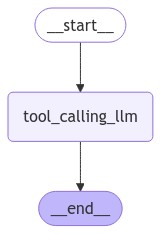

In [12]:
from IPython.display import Image, display

class MessagesState(MessagesState):
    pass

def tool_calling_llm(state: MessagesState):
    return {"messages" : llm_tools.invoke(state["messages"])}

builder = StateGraph(MessagesState)

builder.add_node("tool_calling_llm", tool_calling_llm)

builder.add_edge(START, "tool_calling_llm")

builder.add_edge("tool_calling_llm", END)

graph = builder.compile()


display(Image(graph.get_graph().draw_mermaid_png()))

In [14]:
response = graph.invoke({"messages" : HumanMessage(content="Hello!")})

response

{'messages': [HumanMessage(content='Hello!', additional_kwargs={}, response_metadata={}, id='3372ae9b-7118-421b-9679-fa847870e999'),
  AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 54, 'total_tokens': 64, 'completion_tokens_details': {'audio_tokens': 0, 'reasoning_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0ba0d124f1', 'finish_reason': 'stop', 'logprobs': None}, id='run-dee44c82-f22d-4f83-b0c1-7834f9ff8fb4-0', usage_metadata={'input_tokens': 54, 'output_tokens': 10, 'total_tokens': 64, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [15]:
response = graph.invoke({"messages" : HumanMessage(content="What is the Multiply of 2 & 3")})

response

{'messages': [HumanMessage(content='What is the Multiply of 2 & 3', additional_kwargs={}, response_metadata={}, id='6399bdc7-9b0a-4cc1-94a0-91c3c62e21c9'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_eZRXaC21tandbPpVVzOKqgan', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'Multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 62, 'total_tokens': 80, 'completion_tokens_details': {'audio_tokens': 0, 'reasoning_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_0ba0d124f1', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-de8812b9-d999-4e4e-b9b8-7c6a9e8ad59f-0', tool_calls=[{'name': 'Multiply', 'args': {'a': 2, 'b': 3}, 'id': 'call_eZRXaC21tandbPpVVzOKqgan', 'type': 'tool_call'}], usage_metadata={'input_tokens': 62, 